## CLUSTERS SENSORES

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import datasets
from sklearn.cluster import KMeans 
from scipy.spatial.distance import cdist
import os

https://archive.ics.uci.edu/ml/datasets/Daily+and+Sports+Activities

### 6 actividades 1 persona 1 sensor 

In [2]:

lista_segmentos = range(1,61)
lista_actividades = range(1,7)
lista_personas = range(1,2)
df = pd.DataFrame()
lista_path = []
for i in lista_actividades:
    for k in lista_personas:
        if i < 10:
                for j in lista_segmentos:
                    if j < 10:
                        path = f"/Users/rociocuestapedraz/Desktop/data/a0{i}/p{k}/s0{j}.txt"
                        lista_path.append(path)
                        df1 = pd.read_csv(path, names = range(45))
                        df1 = df1.iloc[:,:9]
                        df1 = df1.to_numpy().flatten()
                        df1 = pd.DataFrame(df1).T
                        df = df.append(df1)
                    else:
                        
                        path = f"/Users/rociocuestapedraz/Desktop/data/a0{i}/p{k}/s{j}.txt"
                        lista_path.append(path)
                        df1 = pd.read_csv(path, names = range(45))
                        df1 = df1.iloc[:,:9]
                        df1 = df1.to_numpy().flatten()
                        df1 = pd.DataFrame(df1).T
                        df = df.append(df1)
        else:
            for j in lista_segmentos:
                if j < 10:
                    
                    path =  f"/Users/rociocuestapedraz/Desktop/data/a{i}/p{k}/s0{j}.txt"
                    lista_path.append(path)
                    df1 = pd.read_csv(path, names = range(45))
                    df1 = df1.iloc[:,:9]
                    df1 = df1.to_numpy().flatten()
                    df1 = pd.DataFrame(df1).T
                    df = df.append(df1)
                else:
                    path = f"/Users/rociocuestapedraz/Desktop/data/a{i}/p{k}/s{j}.txt"
                    lista_path.append(path)
                    df1 = pd.read_csv(path, names = range(45))
                    df1 = df1.iloc[:,:9]
                    df1 = df1.to_numpy().flatten()
                    df1 = pd.DataFrame(df1).T
                    df = df.append(df1)

### PCA

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124
0,8.1305,1.0349,5.4217,-0.009461,0.001915,-0.003424,-0.78712,-0.069654,0.15730,8.1305,...,0.13478,7.9812,1.0945,5.6005,-0.005819,0.016371,0.002868,-0.79209,-0.070456,0.13423
0,7.9665,1.1684,5.6755,-0.005730,0.026995,-0.009029,-0.79062,-0.071635,0.13429,7.9516,...,0.12762,7.8991,1.1389,5.7204,0.003239,0.021752,0.000058,-0.79384,-0.070314,0.12694
0,7.8917,1.1390,5.6980,0.014180,0.028722,-0.009079,-0.79531,-0.069460,0.12447,7.9065,...,0.13108,7.9588,1.1239,5.6168,0.006900,0.028915,-0.000911,-0.79375,-0.071949,0.13380
0,7.9366,1.1536,5.6318,0.003242,0.029965,0.009111,-0.79292,-0.070358,0.13194,7.9665,...,0.12063,7.8090,1.2047,6.0569,-0.003188,0.003819,-0.016342,-0.79537,-0.072348,0.11873
0,7.8913,1.1972,5.9082,-0.044333,-0.067467,-0.004235,-0.79592,-0.073174,0.12086,7.8696,...,0.14448,8.0486,1.1383,5.4544,-0.009570,-0.010470,-0.010857,-0.79026,-0.071108,0.14722


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

In [8]:
X=df.values
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [13]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_std)
print(len(pca.explained_variance_ratio_))


360


In [19]:
#360 es lo que va en el range!!!!!!!!!!!!!!!!!!

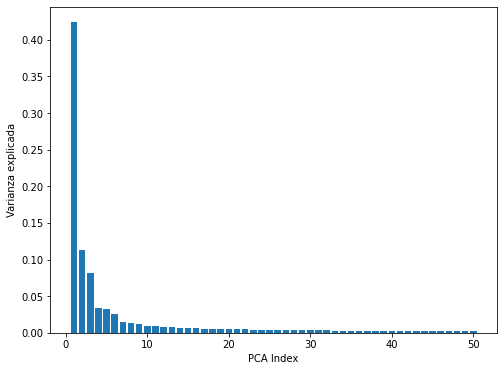

In [18]:
plt.figure(figsize=(8,6))
plt.bar(range(1,51), pca.explained_variance_ratio_[0:50])
plt.ylabel('Varianza explicada')
plt.xlabel('PCA Index')
plt.show()

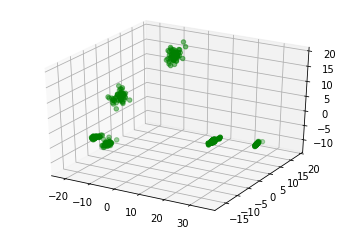

In [20]:
# Scatter
df1 = pd.DataFrame()
df1["a1"]= X_pca[:,0]
df1["a2"] = X_pca[:,1]
df1["a3"] = X_pca[:,2]
x = df1["a1"]
y = df1["a2"]
z = df1["a3"]

# importamos las librerias necesarias
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

# Creamos la figura
fig = plt.figure()
# Creamos el plano 3D
ax1 = fig.add_subplot(111, projection='3d')

# Agregamos los puntos en el plano 3D
ax1.scatter(x, y, z, c='g', marker='o')

# Mostramos el gráfico
plt.show()

### K-Means con PCA

In [25]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [26]:
#Creo una lista con las clases reales para evaluar mis clusters
clase=0
filas= len(df)
y = list()
for fila in range(filas):
    y.append(clase)
    if fila%60 ==0 and fila>0:
        clase +=1

In [27]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(y,kmeans.labels_)

0.966704178325961

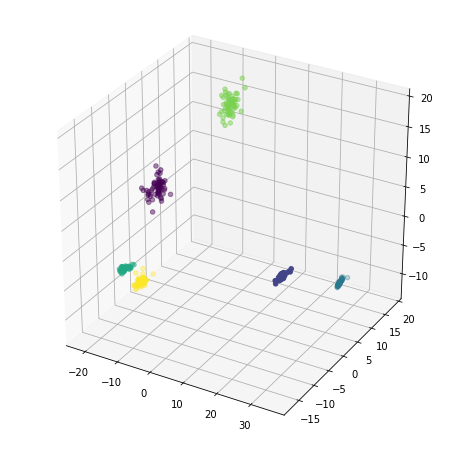

In [35]:
# Scatter
df1 = pd.DataFrame()
df1["a1"]= X_pca[:,0]
df1["a2"] = X_pca[:,1]
df1["a3"] = X_pca[:,2]
x = df1["a1"]
y = df1["a2"]
z = df1["a3"]

# importamos las librerias necesarias
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

# Creamos la figura
fig = plt.figure(figsize=(8,8))
# Creamos el plano 3D
ax1 = fig.add_subplot(111, projection='3d')

# Agregamos los puntos en el plano 3D
ax1.scatter(x, y, z, c=kmeans.labels_, marker='o')

# Mostramos el gráfico
plt.show()

### K-Means

**Tecnica del codo**

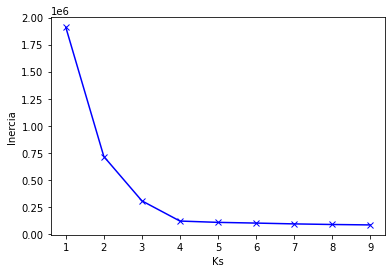

In [3]:
X=np.array(df)
inercias = [] 
  
for k in range(1,10): 
    kmeans = KMeans(k)
    kmeans.fit(X)     
    inercias.append(kmeans.inertia_)

plt.plot(range(1,10), inercias, 'bx-') 
plt.xlabel('Ks') 
plt.ylabel('Inercia') 
plt.show()

El numero optimo de clusters serian 3, pero necesitamos que clasifique 6 actividades.

In [4]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [5]:
df.shape

(360, 1125)

In [6]:
360/6

60.0

In [7]:
#Creo una lista con las clases reales para evaluar mis clusters
clase=0
filas= len(df)
y = list()
for fila in range(filas):
    y.append(clase)
    if fila%60 ==0 and fila>0:
        clase +=1

In [8]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(y,kmeans.labels_)

0.7244010193320515

**CONCLUSION: Clasifica bien en el 96% de los casos** 

### Jerarquico

In [9]:
from sklearn.cluster import AgglomerativeClustering
X=np.array(df)
agglom = AgglomerativeClustering(n_clusters =8, linkage = 'single')
agglom.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=8)

/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """


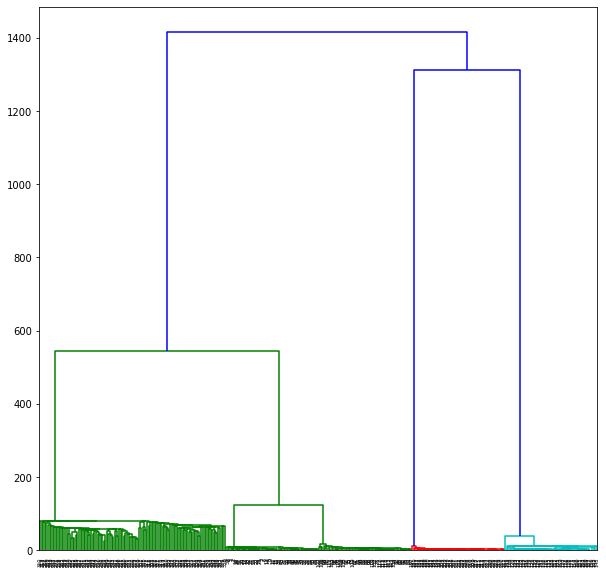

In [18]:
#Para representar el arbol
from scipy.spatial import distance_matrix 
dist_matrix = distance_matrix(X,X)
from scipy.cluster import hierarchy 
Z = hierarchy.linkage(dist_matrix, 'single')
import pylab
pylab.figure(figsize=(10,10))
dendro = hierarchy.dendrogram(Z)

In [10]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(y,agglom.labels_)

0.6616171578620256

**Compara jerarquico y kmeans**

In [11]:
def generaClustering(numeroKlusters,data,y):
    kmeans = KMeans(n_clusters=numeroKlusters, n_jobs=-1)
    kmeans.fit(data) 
    print("kmean: ",adjusted_rand_score(y,kmeans.labels_))
    linkage = ['ward', 'complete', 'average', 'single']
    for link in linkage:
        agglom = AgglomerativeClustering(n_clusters = numeroKlusters, linkage = link)
        agglom.fit(data)
        print("Hierarchichal con " + link + ": ",adjusted_rand_score(y,agglom.labels_))

In [12]:
generaClustering(6,df,y)

kmean:  0.9472854734365294
Hierarchichal con ward:  0.9476233870683465
Hierarchichal con complete:  0.653552909116684
Hierarchichal con average:  0.6610873310596258
Hierarchichal con single:  0.6634868317222861


### DBSCAN

In [4]:
from sklearn.cluster import DBSCAN 
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler

In [7]:
X=np.array(df)
X = MinMaxScaler().fit_transform(X)

In [11]:
epsilon = 2
minimumSamples = 10
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_

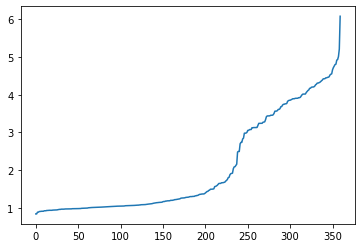

In [10]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [12]:
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1, -1,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3, -1,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3

In [13]:
#Creo una lista con las clases reales para evaluar mis clusters
clase=0
filas= len(df)
y = list()
for fila in range(filas):
    y.append(clase)
    if fila%60 ==0 and fila>0:
        clase +=1

In [14]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(y,labels)

0.7406214403756254

### 1 actividad, 8 personas

In [14]:
lista_segmentos = range(1,61)
lista_personas = range(1,9)
df = pd.DataFrame()

lista_path = []
for i in lista_personas:
        for j in lista_segmentos:
            if j < 10:
                path = r"/Users/rociocuestapedraz/Desktop/data/a01/p"+str(i)+"/s0"+str(j)+".txt"
                lista_path.append(path)
                df1 = pd.read_csv(path, names = range(45))
                df1 = df1.iloc[:,:9]
                df1 = df1.to_numpy().flatten()
                df1 = pd.DataFrame(df1).T
                df = df.append(df1)
            else:
                path = r"/Users/rociocuestapedraz/Desktop/data/a01/p"+str(i)+"/s"+str(j)+".txt"
                lista_path.append(path)
                df1 = pd.read_csv(path, names = range(45))
                df1 = df1.iloc[:,:9]
                df1 = df1.to_numpy().flatten()
                df1 = pd.DataFrame(df1).T
                df = df.append(df1)

In [15]:
df.shape

(480, 1125)

In [16]:
480/8

60.0

In [17]:
#Creo una lista con las clases reales para evaluar mis clusters
clase=0
filas= len(df)
y = list()
for fila in range(filas):
    y.append(clase)
    if fila%60 ==0 and fila>0:
        clase +=1

In [18]:
generaClustering(8,df,y)

kmean:  0.7790216967863044
Hierarchichal con ward:  0.7733528052567316
Hierarchichal con complete:  0.6528117081514142
Hierarchichal con average:  0.5469862788090715
Hierarchichal con single:  0.5725255585310625


### 6 actividades, 8 personas

In [19]:

lista_segmentos = range(1,61)
lista_actividades = range(1,7)
lista_personas = range(1,9)
df = pd.DataFrame()
lista_path = []
for i in lista_actividades:
    for k in lista_personas:
        if i < 10:
                for j in lista_segmentos:
                    if j < 10:
                        path = f"/Users/rociocuestapedraz/Desktop/data/a0{i}/p{k}/s0{j}.txt"
                        lista_path.append(path)
                        df1 = pd.read_csv(path, names = range(45))
                        df1 = df1.iloc[:,:9]
                        df1 = df1.to_numpy().flatten()
                        df1 = pd.DataFrame(df1).T
                        df = df.append(df1)
                    else:
                        
                        path = f"/Users/rociocuestapedraz/Desktop/data/a0{i}/p{k}/s{j}.txt"
                        lista_path.append(path)
                        df1 = pd.read_csv(path, names = range(45))
                        df1 = df1.iloc[:,:9]
                        df1 = df1.to_numpy().flatten()
                        df1 = pd.DataFrame(df1).T
                        df = df.append(df1)
        else:
            for j in lista_segmentos:
                if j < 10:
                    
                    path =  f"/Users/rociocuestapedraz/Desktop/data/a{i}/p{k}/s0{j}.txt"
                    lista_path.append(path)
                    df1 = pd.read_csv(path, names = range(45))
                    df1 = df1.iloc[:,:9]
                    df1 = df1.to_numpy().flatten()
                    df1 = pd.DataFrame(df1).T
                    df = df.append(df1)
                else:
                    path = f"/Users/rociocuestapedraz/Desktop/data/a{i}/p{k}/s{j}.txt"
                    lista_path.append(path)
                    df1 = pd.read_csv(path, names = range(45))
                    df1 = df1.iloc[:,:9]
                    df1 = df1.to_numpy().flatten()
                    df1 = pd.DataFrame(df1).T
                    df = df.append(df1)

In [21]:
df.shape

(2880, 1125)

In [25]:
2880/6

480.0

In [26]:
480/8

60.0

In [27]:
clase=0
filas= len(df)
y = list()
for fila in range(filas):
    y.append(clase)
    if fila%480 ==0 and fila>0:
        clase +=1

In [28]:
generaClustering(6,df,y)

kmean:  0.3925207621229636
Hierarchichal con ward:  0.4084370948236039
Hierarchichal con complete:  0.3720337527417247
Hierarchichal con average:  0.2909019828294239
Hierarchichal con single:  0.360272557224627
